<h1 align="center">Data Cleaning and Imputation of Missing Values</h1>

This file contains Python codes and commentary on the following:  

1. **General exploration of data** to check for columns with null values.  
2. **Heatmap of correlation** to analyze relationships between variables.  
3. **Scatter plot** of all countries and timeframes to observe graph patterns.  
4. **Pivot table** to visualize missing years and select years along with risk factors.  
5. **Missing Values Table**: Overview of the number of countries with missing data, highlighting those that require imputation.
6. **Imputation of missing values** along with risk factors.  


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 1. General exploration of data

The initial exploration of the dataset reveals that while there are no immediate null values within individual cells, the data exhibits significant variability across countries. A preliminary inspection highlights that the time span covered by the data is not uniform across all countries. Some countries have data spanning the entire period from 1970 to 2022, while others have more limited time ranges. This disparity in data availability across countries and time periods is a critical consideration for subsequent analysis, especially for time-sensitive analyses like clustering trends over time.To gain a preliminary understanding of the relationships between the different features, a heatmap of correlations was generated.This heatmap will help us identify relationships between the variables and allow us the see which variables will be most important for inital exploratory scatterplots. 

In [5]:
df = pd.read_csv(r"C:\Users\aliya\DSI_Participant\Team_2_Pharmaceutical_Drug_Spending_by_Countries\Data\flat-ui__data-Tue Mar 11 2025.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LOCATION     1341 non-null   object 
 1   TIME         1341 non-null   int64  
 2   PC_HEALTHXP  1341 non-null   float64
 3   PC_GDP       1341 non-null   float64
 4   USD_CAP      1341 non-null   float64
 5   TOTAL_SPEND  1341 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 63.0+ KB


## 2. Heatmap of correlation

To gain an initial understanding of how the variables interact, a correlation heatmap was generated. Several noteworthy correlations emerge:

- **PC_HEALTHXP** and **PC_GDP** show a relatively strong positive correlation(0.72), suggesting that countries spending a higher percentage of GDP on pharmaceuticals also tend to allocate a larger share of their health budgets to pharmaceuticals.

- **PC_GDP** and **USD_CAP** display a moderately high correlation(0.64), indicating that as pharmaceutical spending rises relative to GDP, per capita spending in USD also tends to increase.

## Implications for Clustering:

When clustering countries, consider that PC_GDP and PC_HEALTHXP likely provide overlapping information. You might choose to use one or both, but be aware of the potential for redundancy.
USD_CAP provides a different view of pharmaceutical spending, reflecting the actual monetary amount spent per person. This could be a valuable feature for distinguishing clusters.

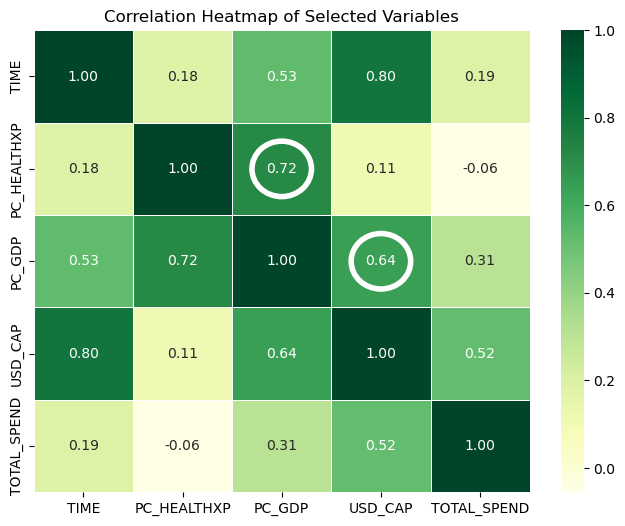

In [6]:
# Selecting only numerical columns for the heatmap
numeric_cols = ['TIME', 'PC_HEALTHXP', 'PC_GDP', 'USD_CAP', 'TOTAL_SPEND']
df_numeric = df[numeric_cols]

# Compute the correlation matrix
corr_matrix = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
ax = sns.heatmap(corr_matrix, annot=True, cmap='YlGn', fmt=".2f", linewidths=0.5)

# Identify the position of PC_GDP & PC_HEALTHXP in the correlation matrix
x_idx = numeric_cols.index("PC_GDP")  
y_idx = numeric_cols.index("PC_HEALTHXP")  

x_idx2 = numeric_cols.index("USD_CAP")  
y_idx2 = numeric_cols.index("PC_GDP")

# Function to draw circles
def draw_circle(x, y):
    circle = plt.Circle((x + 0.5, y + 0.5), 0.3, color='white', fill=False, linewidth=4)
    ax.add_patch(circle)

# Draw circles on the specified correlation values
draw_circle(x_idx, y_idx)  # PC_GDP vs PC_HEALTHXP
draw_circle(x_idx2, y_idx2)  # USD_CAP vs PC_GDP

# Title
plt.title("Correlation Heatmap of Selected Variables")
# plt.savefig("correlation_heatmap.png", format="png", dpi=300, bbox_inches="tight")  # Saving the file as png
plt.show()

## 3. Scatterplots


- **Scatterplot of PC_HEALTHXP and PC_GDP**: This scatterplot illustrates the relationship between the percentage of GDP spent on pharmaceuticals (PC_GDP) and the share of health expenditure allocated to pharmaceuticals (PC_HEALTHXP). The positive correlation indicates that countries investing a larger fraction of their overall economy in pharmaceuticals also tend to devote a greater portion of their health budgets to pharmaceutical spending.

- **Scatterplot of USD_CAP and PC_GDP**:The scatterplot depicts the positive relationship observed in the heatmap between USD_CAP and PC_GDP. As PC_GDP increases, USD_CAP tends to rise accordingly. The wide dispersion of data points also highlights significant variability in both metrics across different countries and time periods.

However both the visualizations combine data from all countries and time periods, which may hide any changes in spending behavior over time. A country’s approach to pharmaceutical spending can shift significantly across different years, and this plot does not capture those variations. 
Additionally putting all countries across all timeframes on a single scatterplot will not help us in making meaningfull cluster i.e one country can fall in 2 different clusters based on their pharma spending patterns across the years. 



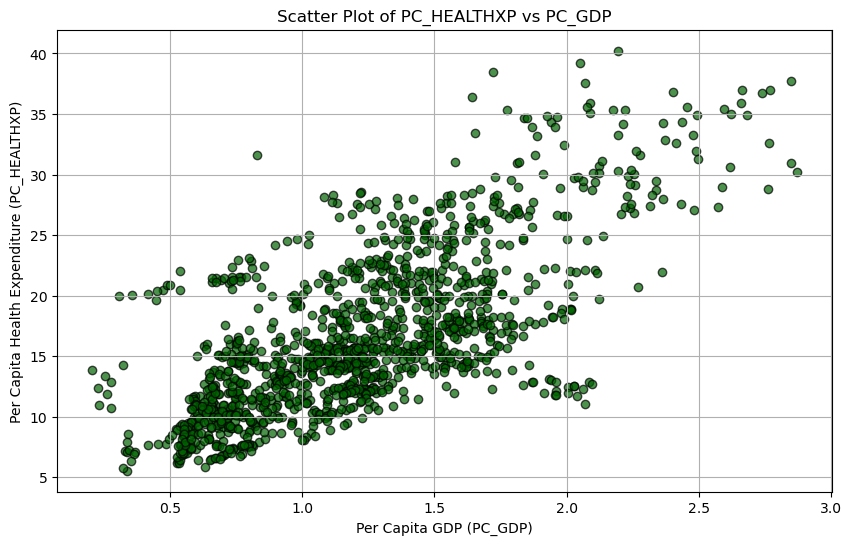

In [10]:
# Create the scatter plot of PC_HEALTHEXP and PC_GDP to see the relationship 
plt.figure(figsize=(10, 6))
plt.scatter(df['PC_GDP'], df['PC_HEALTHXP'], color='darkgreen', alpha=0.7, edgecolors='black')

# Labels and title
plt.xlabel('Per Capita GDP (PC_GDP)')
plt.ylabel('Per Capita Health Expenditure (PC_HEALTHXP)')
plt.title('Scatter Plot of PC_HEALTHXP vs PC_GDP')
plt.grid(True)

# plt.savefig("scatterplot_1_all_locations_all_time.png", format="png", dpi=300, bbox_inches="tight")
# Show the plot
plt.show()

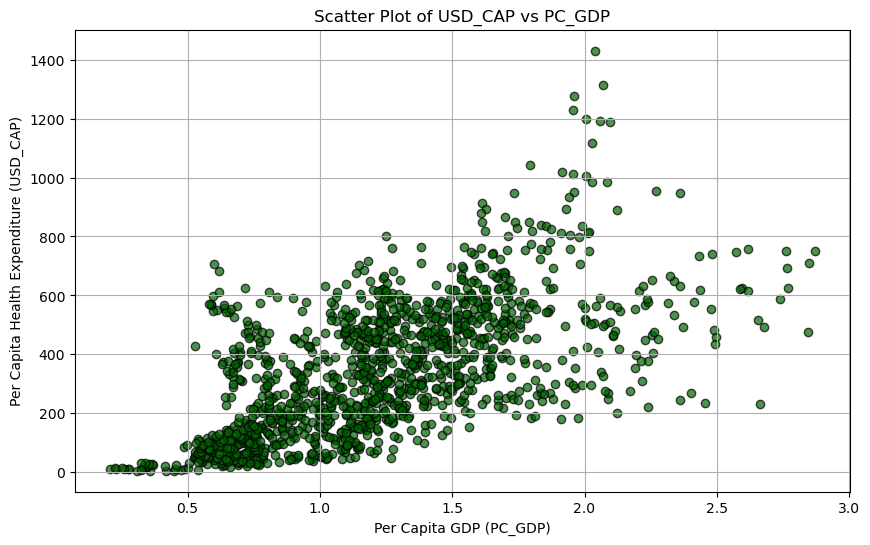

In [ ]:
# Create the scatter plot of USD_CAP and PC_GDP to see the relationship 
plt.figure(figsize=(10, 6))
plt.scatter(df['PC_GDP'], df['USD_CAP'], color='darkgreen', alpha=0.7, edgecolors='black')

# Labels and title
plt.xlabel('Per Capita GDP (PC_GDP)')
plt.ylabel('Per Capita Health Expenditure (USD_CAP)')
plt.title('Scatter Plot of USD_CAP vs PC_GDP')
plt.grid(True)

# plt.savefig("scatterplot_2_all_locations_all_time.png", format="png", dpi=300, bbox_inches="tight")
# Show the plot
plt.show()

## 4. Visualizing missing years and selection of timeframe

This pivot table clearly illustrates data availability across different countries and years. Each green cell represents an existing observation for a given country-year combination, while the white cells highlight missing years.From this visualization, we can quickly see which years and countries are most densely populated with data. For instance, certain earlier years may have sporadic coverage, whereas more recent years often feature more consistent records. This overview is crucial for determining where data imputation will be needed. 

To complement the pivot table, we also generated a summary table that lists, for each country, the total number of observations, the count of missing values, and the percentage of missing data specifically from 2011 to 2021. This numeric breakdown helps us quantify data gaps more precisely:

- Countries with low or zero missing values are prime candidates for in-depth analysis without requiring extensive data imputation.
- Countries with high percentages of missing data highlight areas where additional investigation or targeted imputation strategies may be necessary.

## Rationale for Using 2011–2021
 - **Recency and Relevance**: By narrowing our focus to 2011–2021, we ensure our analysis captures modern trends in pharmaceutical spending, making our insights more applicable to current policy and market decisions.

- **Consistent Coverage**: Both the pivot table and the numeric summary reveal that most countries have more comprehensive data for this recent decade. Limiting our scope to these years minimizes the extent of missing values and, consequently, reduces the need for imputation.

- **Reduced Complexity**: A decade-long timeframe offers a balanced window for capturing meaningful variations in spending without digging deep into older and potentially less relevant data. This more focused dataset is easier to manage and helps us draw clearer comparisons across countries.

In [ ]:
from matplotlib.colors import ListedColormap

C:\Users\aliya\AppData\Local\Temp\ipykernel_9528\2034842204.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_table = pivot_table.applymap(lambda x: 1 if x > 0 else 0)


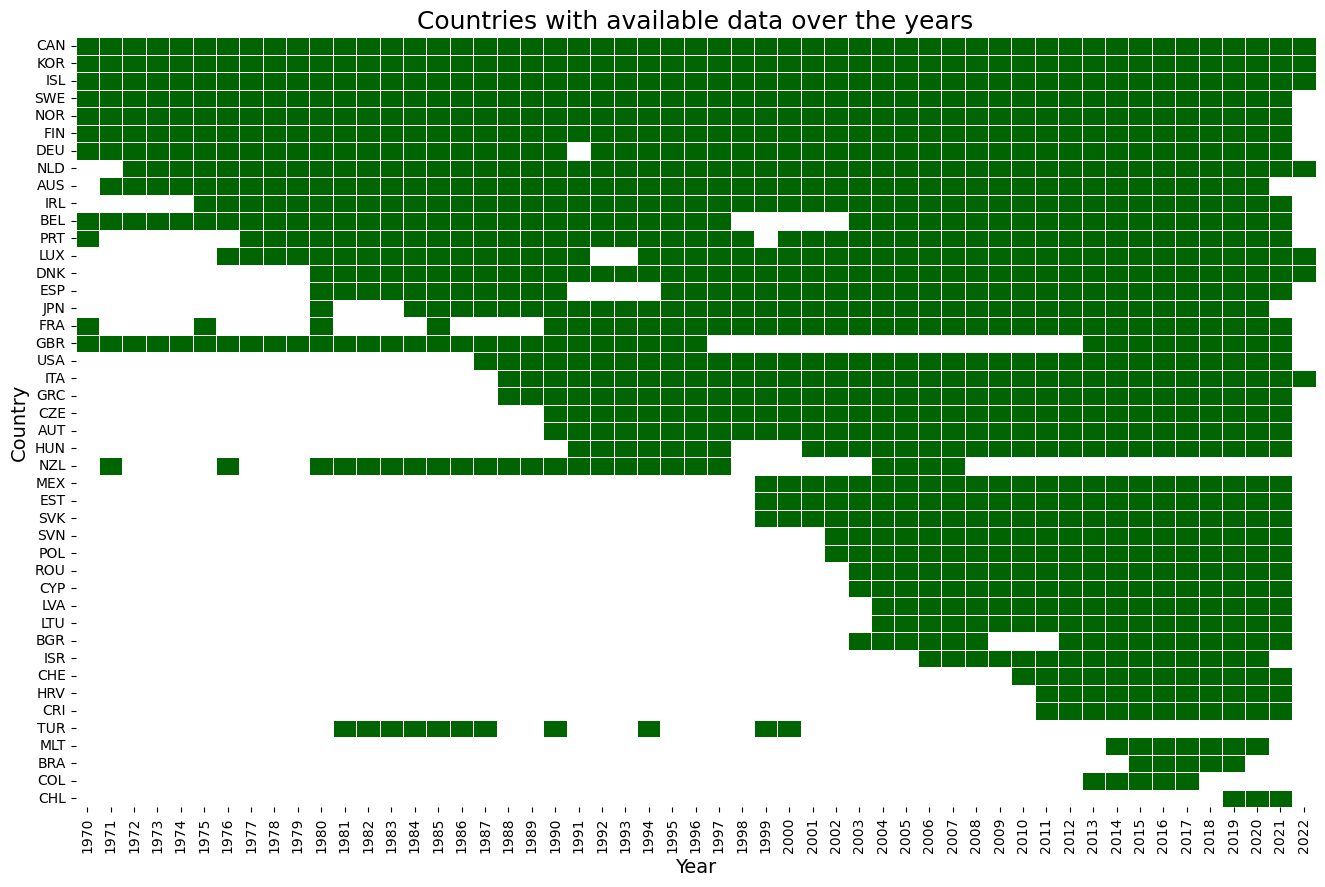

In [ ]:
# Create a pivot table with countries to see how many values are we missing
pivot_table = df.pivot_table(index='LOCATION', columns='TIME', aggfunc='size', fill_value=0)

# Convert the pivot table to a binary format (presence or absence of observation)
pivot_table = pivot_table.applymap(lambda x: 1 if x > 0 else 0)

# Count the number of observations per country
observation_counts = pivot_table.sum(axis=1)

# Sort the countries by the number of observations
sorted_countries = observation_counts.sort_values(ascending=False).index

# Reorder the pivot table based on the sorted countries
pivot_table_sorted = pivot_table.loc[sorted_countries]

# Plot the heatmap with green boxes and white background.
plt.figure(figsize=(16, 10), facecolor='white')  # Set figure background to white
heatmap = sns.heatmap(
    pivot_table_sorted,
    cmap=sns.color_palette(['white', 'darkgreen']), # White for 0, light green for 1
    cbar=False,
    linewidths=.5,
    linecolor='white' #Set grid line color to white
)

# Add labels and title
plt.rcParams['font.family'] = 'sans-serif' #set global font to sans-serif
heatmap.set_xlabel('Year', fontsize=14)
heatmap.set_ylabel('Country', fontsize=14)
heatmap.set_title('Countries with available data over the years', fontsize=18)

# plt.savefig("pivot_table.png", format="png", dpi=300, bbox_inches="tight")
# Display the heatmap
plt.show()

In [12]:
# Define the full range of years
total_years = set(range(2011, 2021))  # 2011 to 2021 (inclusive)

# Calculate number of observations, missing values, and % missing
summary_list = []

for country in df['LOCATION'].unique():
    observed_years = set(df[df['LOCATION'] == country]['TIME'])
    num_observations = len(observed_years)
    num_missing = len(total_years - observed_years)
    percent_missing = (num_missing / len(total_years)) * 100
    
    summary_list.append([country, num_observations, num_missing, f"{percent_missing:.2f}%"])

# Create DataFrame
summary_df = pd.DataFrame(summary_list, columns=['Country Code', '# of Observations', '# of Missing Values from 2011 to 2021', '% Missing'])

# Sort by % missing (descending order)
summary_df = summary_df.sort_values(by='% Missing', ascending=False)

summary_df.style.set_properties(**{'text-align': 'center'}).set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'center')]}]
)



,Country Code,# of Observations,# of Missing Values from 2011 to 2021,% Missing
7,CHL,3,8,80.00%
4,BRA,5,5,50.00%
8,COL,5,5,50.00%
32,MLT,7,3,30.00%
18,GBR,36,2,20.00%
42,TUR,11,10,100.00%
35,NZL,24,10,100.00%
3,BGR,16,1,10.00%
0,AUS,50,0,0.00%
33,NLD,51,0,0.00%


In [ ]:
# Filter the DataFrame for the years 2021
df_filtered = df[df['TIME'].isin([2021])]

# Get the unique countries for each year
countries_2021 = df_filtered[df_filtered['TIME'] == 2021]['LOCATION'].unique()


# Count the number of countries
num_countries_2021 = len(countries_2021)

# Filter the DataFrame for the years 2022
df_filtered_2 = df[df['TIME'].isin([2022])]

# Get the unique countries for each year
countries_2022 = df_filtered_2[df_filtered_2['TIME'] == 2022]['LOCATION'].unique()


# Count the number of countries
num_countries_2022 = len(countries_2022)

# Print the result
print("Countries with values in both 2021:", countries_2021)
print("Number of countries with values in both 2021:", num_countries_2021)
print("Countries with values in both 2022:", countries_2022)
print("Number of countries with values in both 2022:", num_countries_2022)

Countries with values in both 2021: ['AUT' 'BEL' 'BGR' 'CAN' 'CHE' 'CHL' 'CRI' 'CYP' 'CZE' 'DEU' 'DNK' 'ESP'
 'EST' 'FIN' 'FRA' 'GBR' 'GRC' 'HRV' 'HUN' 'IRL' 'ISL' 'ITA' 'KOR' 'LTU'
 'LUX' 'LVA' 'MEX' 'NLD' 'NOR' 'POL' 'PRT' 'ROU' 'SVK' 'SVN' 'SWE' 'USA']
Number of countries with values in both 2021: 36
Countries with values in both 2022: ['CAN' 'DNK' 'ISL' 'ITA' 'KOR' 'LUX' 'NLD']
Number of countries with values in both 2022: 7


Now that we have selected our years we will be doing data imputation. By taking median as the imputed value. 

In [ ]:
# Filter data for the years 2011 to 2021
df_filtered_years = df[df['TIME'].between(2011, 2021, inclusive='both')].copy()

# Count the number of observations per country in the filtered timeframe
observation_counts = df_filtered_years['LOCATION'].value_counts()

# Identify countries with at least 5 observations
countries_to_keep = observation_counts[observation_counts >= 5].index

# Create a new DataFrame with only the selected countries
df_cleaned = df_filtered_years[df_filtered_years['LOCATION'].isin(countries_to_keep)].copy()

# Impute missing years with the median for each country
def impute_missing_years(group):
    years = group['TIME'].unique()
    all_years = range(2011, 2022)
    missing_years = set(all_years) - set(years)

    if missing_years:
        median_values = group.median(numeric_only=True) #added mean here as Data might be skewed for some years. Median value will be a better impute
        for year in missing_years:
            new_row = {'LOCATION': group['LOCATION'].iloc[0], 'TIME': year}
            for col in median_values.index:
                if col not in ['LOCATION', 'TIME']:
                    new_row[col] = median_values[col]
            group = pd.concat([group, pd.Series(new_row).to_frame().T], ignore_index=True)
    return group.sort_values(by='TIME')

df_imputed = df_cleaned.groupby('LOCATION', group_keys=False).apply(impute_missing_years)

# Reset index for the final cleaned and imputed DataFrame
df_imputed = df_imputed.reset_index(drop=True)

df_imputed

C:\Users\aliya\AppData\Local\Temp\ipykernel_9528\4261533212.py:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_imputed = df_cleaned.groupby('LOCATION', group_keys=False).apply(impute_missing_years)


,LOCATION,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,TOTAL_SPEND
0,AUS,2011,15.311,1.307,583.222,13029.19
1,AUS,2012,15.308,1.328,589.993,13412.59
2,AUS,2013,14.345,1.255,586.402,13562.38
3,AUS,2014,12.498,1.229,569.455,13368.35
4,AUS,2015,12.442,1.267,594.233,14152.25
...,...,...,...,...,...,...
446,USA,2017,11.954,2.004,1200.769,390396.57
447,USA,2018,11.766,1.957,1229.266,401771.09
448,USA,2019,11.767,1.961,1277.032,419287.86
449,USA,2020,11.037,2.07,1315.218,436030.19


In [ ]:
# df_imputed.to_csv('processed_data.csv', index=False) # → was done to download the file with imputations to the our working directory